<a href="https://colab.research.google.com/github/lauravazqx/Analisis-Numerico/blob/main/copia%20Proyecto_M%C3%A9todos_Cuantitativos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center><b>PROYECTO DE MÉTODOS CUANTITATIVOS EN FINANZAS</b></center>


## <b>Descripción del proyecto</b>

Este proyecto consiste en el desarrollo de "códigos" que nos permitan obtener portafolios óptimos, es decir, que sean de varianza mínima y con el mejor rendimiento.

Haremos uso de la teoría de optimazación de portafolios de "Harry Markowitz", en el cual se menciona que existe la posibilidad de construir un portafalio eficiente al hacer la selección de activos que minimicen el riesgo para un nivel dado de rendiminento esperado.

## <b>Diversificando un Portafolio<b/>

#### ¿Qué es la diversificación de un portafolio?

La diversificación de un portafolio es una estrategia de inversión que consiste en combinar diferentes activos financieros para reducir el riesgo total del portafolio. Al incluir activos que no se mueven en perfecta sincronía, se minimiza el impacto de las fluctuaciones negativas de uno o más activos individuales sobre el rendimiento general del portafolio. La diversificación se basa en la idea de que no todos los activos responderán de la misma manera a los cambios en el mercado, por lo que una combinación adecuada de activos puede mitigar el riesgo sin sacrificar rendimiento potencial.

#### Importancia de la diversificación

La diversificación es crucial en la gestión de portafolios debido a los siguientes aspectos:

* Reducción del Riesgo No Sistemático: El riesgo total de un portafolio se compone del riesgo sistemático (afecta a todos los activos en el mercado) y el riesgo no sistemático (afecta a activos específicos o sectores). La diversificación permite reducir el riesgo no sistemático al distribuir las inversiones en distintos activos, sectores o mercados. Así, los movimientos adversos en algunos activos pueden ser compensados por movimientos positivos en otros.

* Optimización del Riesgo-Retorno: La teoría moderna de portafolios sugiere que, mediante una selección diversificada de activos, es posible construir portafolios que maximizan el rendimiento esperado para un nivel de riesgo determinado, o minimizan el riesgo para un rendimiento esperado. Esto es fundamental para los inversionistas que buscan equilibrar sus objetivos de rendimiento con su tolerancia al riesgo.

* Mayor Estabilidad y Protección contra la Volatilidad: Un portafolio diversificado es menos volátil y más estable, ya que los activos que no están perfectamente correlacionados tenderán a compensar sus movimientos entre sí. Esto protege al inversionista de fluctuaciones extremas y contribuye a una mayor estabilidad a lo largo del tiempo.

#### Formas de medir la diversificación

Para evaluar la diversificación de un portafolio, existen métricas que ayudan a identificar cómo interactúan los activos entre sí y cuánto contribuyen a reducir el riesgo global del portafolio. Algunas de las más importantes son el coeficiente de correlación y la matriz de varianza y covarianza.

1. **El coeficiente de correlación**

El coeficiente de correlación mide la relación lineal entre los rendimientos de dos activos y toma valores entre -1 y +1:

* +1 indica una correlación perfecta positiva, donde ambos activos se mueven en la misma dirección y de manera proporcional.

* -1 indica una correlación perfecta negativa, donde los activos se mueven en direcciones opuestas de manera proporcional.

* 0 sugiere que no hay relación lineal en los movimientos de los activos.

En el contexto de diversificación, es deseable incluir activos con correlación baja o negativa en el portafolio. Esto se debe a que, al combinar activos que no se mueven de manera sincronizada, se logra reducir el riesgo total del portafolio, ya que las caídas en unos activos pueden ser compensadas por el desempeño positivo de otros.



2. **Matriz de Varianza y Covarianza**

La matriz de varianza y covarianza es una herramienta matemática que organiza las varianzas y covarianzas de todos los pares de activos en un portafolio. Cada elemento en esta matriz representa la covarianza entre dos activos específicos, mientras que los elementos en la diagonal principal representan la varianza (o el riesgo) de cada activo individual.

* Varianza: Indica la volatilidad de un activo, o la medida de su riesgo inherente. Una alta varianza en un activo refleja que su precio es más volátil.

* Covarianza: Mide la relación conjunta entre dos activos; una covarianza alta y positiva indica que los activos tienden a moverse en la misma dirección, mientras que una covarianza negativa indica que se mueven en direcciones opuestas.

La matriz de varianza y covarianza es fundamental para calcular la volatilidad total del portafolio y para construir portafolios eficientes. Al incluir activos con covarianzas bajas o negativas, se puede reducir la volatilidad total del portafolio, logrando un nivel de diversificación óptimo.

In [ ]:
# Importamos las librerías necesarias para poder desarrollar el proyecto (en este caso, no será necesario instalar la librería de yfinance).
import yfinance as yf
import pandas as pd
import math
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from google.colab import files

### <b>Descripcion de las acciones:<b/>

* Banco Santander: Institución financiera que ofrece servicios bancarios, de financiamiento y seguros.


* Bank of America: Uno de los mayores bancos en EE. UU. Ofrece servicios de banca comercial, inversión y administración de patrimonio a nivel global.

* JPMorgan Chase & Co.: Banco de inversión y servicios financieros global que destaca en banca corporativa, administración de activos y servicios de inversión.

* Wells Fargo & Co.: Banco estadounidense que ofrece servicios financieros diversos, incluyendo banca de consumo, préstamos hipotecarios y seguros.

* Goldman Sachs Group Inc.: Multinacional de banca de inversión, gestión de activos y servicios financieros, enfocada en mercados de capital y asesoría financiera.

* Apple: Empresa de tecnología conocida por sus productos innovadores como el iPhone, iPad y Mac, además de su ecosistema de software y servicios.

* Microsoft: Líder en software, servicios en la nube y soluciones tecnológicas empresariales, con productos destacados como Windows, Office y Azure.

* NVIDIA: Desarrollador de unidades de procesamiento gráfico (GPU) para videojuegos, inteligencia artificial y procesamiento en la nube.

* Taiwan Semiconductor Manufacturing Company: Principal fabricante mundial de semiconductores, que produce chips para compañías de tecnología globales.

* ASML Holding: Empresa holandesa líder en fabricación de equipos para litografía, esenciales para la producción de semiconductores avanzados.
  
* Johnson & Johnson: Multinacional farmacéutica y de productos para el cuidado de la salud, conocida por sus medicamentos, dispositivos médicos y productos de consumo.

* Shell: Empresa energética y petroquímica global con operaciones en petróleo, gas y proyectos de energías renovables.

* Nestlé: Compañía suiza de alimentos y bebidas, reconocida por sus productos en nutrición, salud y bienestar a nivel global.

* Toyota Motor Corporation: Fabricante japonés de automóviles, pionero en tecnologías híbridas y movilidad sostenible.

* Intel: Líder en fabricación de microprocesadores y soluciones de tecnología informática, esencial para equipos de consumo y servidores.

* Alphabet Inc. (Google):  Conglomerado de tecnología conocido por su motor de búsqueda, además de servicios como YouTube, Android y la computación en la nube.

* Adobe Inc.: Proveedor de software de diseño y creatividad, famoso por productos como Photoshop, Illustrator y la suite Creative Cloud.

* Salesforce: Plataforma de gestión de relaciones con clientes (CRM) en la nube, utilizada para ventas, marketing y atención al cliente.

* International Business Machines Corporation: Empresa de tecnología que ofrece hardware, software y servicios de consultoría con enfoque en IA y computación en la nube.

* ServiceNow: Plataforma en la nube para la gestión de servicios empresariales, automatización de flujos de trabajo y soporte TI.

* Nutanix: Proveedor de soluciones de infraestructura hiperconvergente que simplifica la gestión de centros de datos en entornos de nube híbrida.

* Twilio: Plataforma de comunicaciones en la nube que permite integrar mensajes de texto, llamadas y videollamadas en aplicaciones empresariales.

* Snowflake: Empresa de servicios de almacenamiento y análisis de datos en la nube que facilita la gestión y análisis de datos a gran escala.

* Palantir Technologies: Compañía de análisis de datos que proporciona soluciones para grandes volúmenes de datos, enfocada en clientes gubernamentales y empresariales.

* Qualcomm: Multinacional especializada en tecnología inalámbrica y procesamiento móvil, esencial para el desarrollo de redes 5G y dispositivos móviles.

* Zscaler: Empresa de ciberseguridad que ofrece servicios de protección de redes y aplicaciones en la nube para empresas.



In [ ]:
# Lista de activos con los cuales vamos a desarrollar el proyecto
tickers_list = [
    'SAN',   # Banco Santander
    'BAC',   # Bank of America
    'JPM',   # JPMorgan Chase & Co.
    'WFC',   # Wells Fargo & Co.
    'GS',    # Goldman Sachs Group Inc.
    'AAPL',  # Apple
    'MSFT',  # Microsoft
    'NVDA',  # NVIDIA
    'TSM',   # Taiwan Semiconductor Manufacturing Company
    'ASML',  # ASML Holding
    'JNJ',   # Johnson & Johnson
    'SHEL',  # Shell
    'NSRGY', # Nestlé
    'TM',    # Toyota Motor Corporation
    'INTC',  # Intel
    'GOOGL', # Alphabet Inc. (Google)
    'ADBE',  # Adobe Inc.
    'CRM',   # Salesforce
    'IBM',   # International Business Machines Corporation
    'NOW',   # ServiceNow
    'NTNX',  # Nutanix
    'TWLO',  # Twilio
    'SNOW',  # Snowflake
    'PLTR',  # Palantir Technologies
    'QCOM',  # Qualcomm
    'ZS',    # Zscaler
]


### <b>Descargamos el precio de cierre de las acciones</b>

In [ ]:
# Descargar la información histórica para cada ticker de la lista "tickers_list"

# Creamos un DataFrame vacío que usaremos para almacenar el precio de cierre de las acciones
historical_data = pd.DataFrame()

# Hacemos uso de un for, iterando sobre nuestra lista "tickers_list", para descargar la información
# de los precios de cierre desde hace un año. Además, agregamos el nombre de la acción.
for ticker in tickers_list:
    data = yf.Ticker(ticker).history(period="1y")[['Close']]
    # Ponemos el nombre de la columna a cada una de las acciones
    data.columns = [ticker]
    # Concatenamos la información de cada una de las acciones
    historical_data = pd.concat([historical_data, data], axis=1)

# Redondeamos los valores de cierre a 2 decimales
historical_data = historical_data.round(2)

# Finalmente, ajustamos el índice DateTime para que solo muestre año, mes y día
historical_data.index = historical_data.index.date

In [ ]:
# Mostramos los primeros datos descargados de la lista de tickers
print("Datos históricos:\n")
display(historical_data.head())

Datos históricos:



,SAN,BAC,JPM,WFC,GS,AAPL,MSFT,NVDA,TSM,ASML,...,ADBE,CRM,IBM,NOW,NTNX,TWLO,SNOW,PLTR,QCOM,ZS
2023-10-30,3.58,24.99,134.22,38.29,292.77,169.42,334.80,41.15,84.73,584.05,...,526.94,198.39,137.18,568.54,35.12,50.41,144.16,14.69,105.63,156.81
2023-10-31,3.56,25.62,135.82,38.62,295.47,169.90,335.59,40.77,84.98,593.90,...,532.06,199.94,139.12,581.85,36.19,51.26,145.13,14.80,106.76,158.69
2023-11-01,3.58,25.68,135.70,38.47,298.93,173.08,343.49,42.31,86.44,604.83,...,544.50,203.01,139.85,593.48,36.54,50.49,144.26,14.92,108.62,156.65
2023-11-02,3.72,26.87,138.12,39.69,305.35,176.67,345.72,43.49,89.08,627.82,...,558.71,207.19,141.40,599.43,37.36,52.19,142.75,17.97,114.96,159.19
2023-11-03,3.73,27.65,139.66,40.78,318.84,175.75,350.17,44.99,90.37,638.77,...,563.66,206.55,142.25,606.76,37.49,54.10,149.99,18.89,117.08,164.37


### <b>Cálculo de log-rendimientos</b>



### ¿Por qué es mejor usar rendimientos que precios?

En la teoría de portafolios, es preferible utilizar rendimientos en lugar de precios para realizar análisis estadísticos y cálculos, porque los rendimientos reflejan mejor el comportamiento relativo de los activos en términos de crecimiento y riesgo. A continuación, se detallan las principales razones por las cuales el análisis de rendimientos es más adecuado que el de precios:

1. **Medición de la Rentabilidad y Comparación Estandarizada**

Los rendimientos, calculados como la tasa de cambio relativa en los precios (es decir, la variación porcentual), proporcionan una medida de la rentabilidad de un activo en un periodo específico. Esta medida permite comparar activos de distintos precios absolutos en términos de su capacidad para generar beneficios. En cambio, los precios absolutos de dos activos no son comparables directamente, ya que un activo puede tener un precio alto (por ejemplo, \$1,000 por acción) y otro un precio bajo (por ejemplo, \$10 por acción), sin que esto signifique que el primero sea necesariamente mejor o más rentable que el segundo.

2. **Normalización para Series Temporales y Comparabilidad entre Activos**

Los rendimientos permiten normalizar la evolución de los activos a lo largo del tiempo, haciéndolos comparables entre sí y facilitando el análisis en series temporales. Esto es especialmente útil cuando se analiza un portafolio de activos con diferentes niveles de precio y volatilidad. Los rendimientos reflejan los cambios proporcionales y facilitan la observación de patrones en las fluctuaciones de los precios a lo largo del tiempo. Los precios absolutos, por otro lado, no capturan bien estos patrones cuando se comparan diferentes activos.

3. **Captura de Información sobre el Riesgo**

El riesgo se mide comúnmente como la volatilidad (la desviación estándar) de los rendimientos. Al usar rendimientos, se puede calcular de manera precisa la volatilidad y otros indicadores de riesgo de un activo. Los precios no son ideales para este propósito, ya que su volatilidad refleja variaciones absolutas, no proporcionales, lo que no ofrece una evaluación correcta del riesgo relativo de cada activo.

4. **Facilitación de la Diversificación y Cálculo de Correlación**

Los rendimientos permiten calcular la correlación y covarianza entre los activos, que son fundamentales para evaluar cómo se comportan conjuntamente y cómo contribuyen al riesgo del portafolio. La correlación entre precios absolutos no tiene sentido estadístico, ya que no mide la relación entre los cambios proporcionales, sino solo la similitud de sus niveles de precios, lo que no proporciona información útil para la diversificación.

5. **Adaptación a la Teoría y Modelos de Inversión**

La mayoría de los modelos financieros, como el Modelo de Valoración de Activos de Capital (CAPM), Modelo de Varianza Media de Markowitz y otras teorías de portafolio, están diseñados para trabajar con rendimientos. Esto se debe a que los rendimientos permiten modelar las expectativas de crecimiento y volatilidad de los activos de manera ajustada al riesgo y calcular métricas como la beta y el alfa. Por lo tanto, el uso de rendimientos permite una aplicación más precisa y coherente de estas herramientas de análisis.

En resumen, el uso de rendimientos en lugar de precios ofrece una visión más adecuada y práctica del desempeño y riesgo de los activos, permitiendo una comparación directa, una medición correcta de la volatilidad, y la posibilidad de aplicar modelos de teoría de portafolio que ayudan a optimizar la combinación de activos en términos de riesgo y retorno.





#### ¿Por qué los log-rendimientos son apropiados?

Los log-rendimientos (o rendimientos logarítmicos) son una alternativa útil y popular a los rendimientos simples en el análisis financiero, y son especialmente apropiados para estudios de series temporales y modelación de portafolios debido a varias ventajas prácticas y teóricas. A continuación, se explican las principales razones por las que los log-rendimientos se utilizan en finanzas y son particularmente útiles para el análisis y la gestión de portafolios.

1. **Aditividad en el Tiempo**

Una de las propiedades más destacadas de los log-rendimientos es que son aditivos en el tiempo, lo que facilita el cálculo de rendimientos acumulados en diferentes periodos. Si se tienen log-rendimientos diarios, por ejemplo, el rendimiento total de un periodo (como una semana o un mes) se puede obtener simplemente sumando los log-rendimientos diarios. En contraste, los rendimientos simples requieren multiplicación para obtener el rendimiento compuesto de varios periodos, lo cual es menos conveniente.

2. **Aproximación Lineal a Cambios Pequeños**

Para cambios pequeños en el precio, los log-rendimientos son aproximadamente iguales a los rendimientos simples, lo que permite realizar estimaciones lineales. Esta característica es útil para simplificar modelos matemáticos y análisis financieros, especialmente en mercados donde las variaciones diarias de los precios no son muy grandes.

3. **Simetría en Subidas y Bajadas**

Con los log-rendimientos, las subidas y bajadas en el precio de un activo tienen efectos simétricos. En términos de rendimientos simples, una caída del precio de 50 % requiere un aumento del 100 % para recuperar el valor inicial, mientras que en términos de log-rendimientos, el cambio de ida y vuelta es simétrico, lo que simplifica el análisis de fluctuaciones en el precio y hace que las pérdidas y ganancias sean comparables en escala logarítmica.

4. **Distribución Normal Aproximada**

En el análisis financiero, se suele asumir que los rendimientos de los activos siguen una distribución normal (o aproximadamente normal) debido a su facilidad para modelar y analizar. Los log-rendimientos de los activos financieros tienden a seguir mejor esta suposición, ya que el uso del logaritmo suaviza las distribuciones de los datos, reduciendo el efecto de valores extremos (o outliers). Esto hace que sea más fácil aplicar métodos estadísticos y modelos financieros que suponen normalidad en los datos, como el cálculo de VaR (Valor en Riesgo), la teoría de portafolios de Markowitz, entre otros.

5. **Compatibilidad con Modelos de Crecimiento Exponencial**

Los log-rendimientos son apropiados para modelar procesos financieros que siguen una trayectoria exponencial o que crecen de manera compuesta en el tiempo, como los precios de los activos en mercados financieros. Los modelos de crecimiento compuesto son naturales en log-rendimientos, ya que estos asumen que el rendimiento de un periodo afecta exponencialmente al rendimiento de periodos sucesivos, lo cual es característico en muchos activos financieros y en la economía en general.

6. **Facilita la Medición de la Volatilidad**

La volatilidad, o variabilidad de los rendimientos de un activo, se mide de manera más precisa y consistente con log-rendimientos debido a que estos eliminan los efectos de escala y simetrizan los movimientos del activo. Al suavizar la distribución de los rendimientos, se facilita el cálculo de métricas de riesgo y la interpretación de la volatilidad a lo largo de diferentes periodos, siendo útil en aplicaciones prácticas de modelado y optimización de portafolios

In [ ]:
def log_returns_calc(df):
    '''
    log_returns_calc es una función que nos permite calcular los log-rendimientos de un portafolio.

    Esta función recibe un DataFrame que contiene los precios de cierre de los activos.
    Calcula y retorna un DataFrame con los log-rendimientos de los activos.

    Parámetros:
        - df (pd.DataFrame): DataFrame con los precios de cierre de los activos.

    Return:
        - log_returns (pd.DataFrame): DataFrame con los log-rendimientos de los activos.

    '''
    # Hacemos el cálculo de los rendimientos, con la función log de np
    log_returns = np.log(df / df.shift(1)).dropna()
    # Regresamos el DataFrame con los rendimientos
    return log_returns

In [ ]:
# Mostramos el cálculo de los rendimientos de nuestras acciones
log_returns = log_returns_calc(historical_data)
log_returns.head()

,SAN,BAC,JPM,WFC,GS,AAPL,MSFT,NVDA,TSM,ASML,...,ADBE,CRM,IBM,NOW,NTNX,TWLO,SNOW,PLTR,QCOM,ZS
2023-10-31,-0.005602,0.024898,0.011850,0.008582,0.009180,0.002829,0.002357,-0.009277,0.002946,0.016724,...,0.009670,0.007783,0.014043,0.023141,0.030012,0.016721,0.006706,0.007460,0.010641,0.011918
2023-11-01,0.005602,0.002339,-0.000884,-0.003892,0.011642,0.018544,0.023268,0.037077,0.017035,0.018236,...,0.023112,0.015238,0.005234,0.019791,0.009625,-0.015135,-0.006013,0.008075,0.017272,-0.012939
2023-11-02,0.038361,0.045298,0.017676,0.031221,0.021249,0.020530,0.006471,0.027508,0.030084,0.037306,...,0.025763,0.020381,0.011022,0.009976,0.022193,0.033116,-0.010522,0.186001,0.056729,0.016084
2023-11-03,0.002685,0.028615,0.011088,0.027092,0.043231,-0.005221,0.012790,0.033909,0.014378,0.017291,...,0.008821,-0.003094,0.005993,0.012154,0.003474,0.035943,0.049474,0.049929,0.018273,0.032022
2023-11-06,-0.010782,-0.003260,0.007561,-0.006643,-0.011387,0.014517,0.010511,0.016533,0.008814,-0.007764,...,0.003171,-0.000242,0.007215,0.004095,0.007176,-0.016588,-0.039367,-0.018702,0.003411,-0.005490


### <b> Coeficiente de Correlación </b>

En la teoría de portafolios, el *coeficiente de correlación* es una medida estadística que cuantifica el grado de relación lineal entre los rendimientos de dos activos. Representado generalmente por la letra griega $ρ$ (rho), este coeficiente toma valores entre -1 y +1, donde:

* +1 indica una correlación positiva perfecta: ambos activos se mueven en la misma dirección de forma sincronizada. Cuando uno sube, el otro también sube en la misma proporción, y cuando uno baja, el otro también lo hace.

* -1 indica una correlación negativa perfecta: los activos se mueven en direcciones opuestas en cada momento. Si uno sube, el otro baja en la misma proporción.

* 0 sugiere que no hay relación lineal entre los rendimientos de ambos activos; sus movimientos son independientes entre sí.

**Importancia del Coeficiente de Correlación en la Teoría de Portafolios**

En el contexto de la teoría moderna de portafolios, el coeficiente de correlación es fundamental para entender y optimizar el concepto de diversificación. La diversificación implica combinar activos que no estén perfectamente correlacionados entre sí para disminuir el riesgo global del portafolio. La teoría sugiere que un portafolio bien diversificado puede obtener un equilibrio entre riesgo y rendimiento, optimizando su frontera eficiente.

**Impacto de Diferentes Niveles de Correlación**

* Correlación positiva alta ($ρ$ cercano a +1): Si dos activos tienen una correlación alta y positiva, sus movimientos en los precios están muy alineados. Esto implica que al incluir ambos activos en un portafolio, el riesgo total no se reduce significativamente, ya que ambos contribuirán al riesgo de manera similar.

* Correlación negativa ($ρ$ cercano a -1): Cuando los activos tienen una correlación negativa, sus precios se mueven en direcciones opuestas. Esto es beneficioso para la diversificación, ya que las caídas en el valor de un activo pueden ser compensadas por aumentos en el otro, reduciendo la volatilidad y el riesgo del portafolio.

* Correlación cercana a cero: Los activos que tienen una correlación baja o cercana a cero no muestran un patrón predecible de movimiento conjunto, lo cual es ideal para diversificación. La ausencia de una relación lineal permite que las fluctuaciones de cada activo se distribuyan de manera independiente, suavizando el riesgo total del portafolio.

**Uso del Coeficiente de Correlación en la Selección de Activos**

Para construir un portafolio diversificado, se busca incluir activos con correlaciones bajas o negativas entre sí. Esto es porque la combinación de activos no correlacionados ayuda a reducir la volatilidad general y el riesgo sistemático del portafolio, lo cual mejora su desempeño en diferentes escenarios económicos y reduce la vulnerabilidad a movimientos de mercado específicos.

Por lo tanto, el coeficiente de correlación es una herramienta esencial para los gestores de portafolios, ya que permite seleccionar combinaciones de activos que logren un balance óptimo entre riesgo y rendimiento, de acuerdo con los objetivos de inversión y el perfil de riesgo del inversionista.

In [ ]:
def correlations(df_returns):
    '''
    correlations es una función que nos permite calcular la matriz de correlaciones de un portafolio.

    Esta función recibe un DataFrame que contiene los log-rendimientos de los activos.
    Calcula y retorna la matriz de correlaciones de los log-rendimientos de los activos de un portafolio.

    Parámetros:
        - df_returns (pd.DataFrame): DataFrame con los log-rendimientos de los activos.

    Return:
        - correlations (pd.DataFrame): DataFrame con la matriz de correlaciones entre activos.
    '''

    # Hacemos uso del método "corr" de la librería de pandas, que nos ayuda a calcular la matriz de correlación
    # de las acciones de nuestro portafolio
    correlations = df_returns.corr()
    # Devolvemos la matriz de correlación
    return correlations

In [ ]:
# Mostramos la matriz de correlación de nuestras acciones
correlations_matrix = correlations(log_returns)
correlations_matrix.head()

,SAN,BAC,JPM,WFC,GS,AAPL,MSFT,NVDA,TSM,ASML,...,ADBE,CRM,IBM,NOW,NTNX,TWLO,SNOW,PLTR,QCOM,ZS
SAN,1.000000,0.407245,0.396327,0.364746,0.458763,0.153271,0.165340,0.146683,0.228187,0.256016,...,0.002271,0.118736,0.077301,0.045071,0.087070,0.205680,0.148300,0.210146,0.286669,0.177183
BAC,0.407245,1.000000,0.655924,0.753025,0.716638,0.107590,0.120866,0.006412,0.163549,0.174262,...,0.057758,0.183560,0.247422,0.068718,0.123460,0.167795,0.160192,0.241701,0.252817,0.234166
JPM,0.396327,0.655924,1.000000,0.636175,0.668979,0.051362,0.124949,0.073054,0.154123,0.151019,...,0.090182,0.157655,0.261726,0.076900,0.124072,0.107686,0.145598,0.200865,0.182671,0.183190
WFC,0.364746,0.753025,0.636175,1.000000,0.625727,0.065139,0.068408,0.006239,0.128264,0.145463,...,-0.004954,0.126921,0.193698,0.048259,0.135574,0.031295,0.173450,0.163407,0.252046,0.132225
GS,0.458763,0.716638,0.668979,0.625727,1.000000,0.165996,0.202649,0.169362,0.278514,0.302696,...,0.104196,0.213111,0.253018,0.189204,0.186994,0.210577,0.282910,0.284865,0.346311,0.242313


### <b>Análisis de los resultados del coeficiente de correlación</b>

### Aquí puedes hacer un análisis de los resultados del coeficiente de correlación

**Preguntas a responder**:

1. **¿Qué estrategias podrías considerar si dos activos tienen una correlación negativa?**
Piensa en cómo los activos con correlación negativa pueden utilizarse para reducir el riesgo total de un portafolio.

2. **¿Qué nos dice el coeficiente de correlación más bajo de tu matriz? ¿Qué nos dice el coeficiente de correlación más alto?**
Analiza las posibles razones por las que estos activos tienen una correlación baja y qué implicaciones tiene para la diversificación.

3. **Si quisieras construir un portafolio menos arriesgado, basándote en esta matriz de correlaciones, ¿qué pares de activos elegirías y por qué?**
Reflexiona sobre cómo seleccionar activos que maximicen la diversificación y minimicen el riesgo del portafolio.

4. **¿Cómo cambiaría tu estrategia de construcción de portafolios si los coeficientes de correlación cambian significativamente en un horizonte de tiempo diferente?**
Esto invita a reflexionar sobre la estabilidad de las correlaciones y cómo pueden afectar decisiones de largo plazo.

5. **¿Qué factores externos podrían explicar las diferencias en la correlación entre ciertos pares de activos?**
Considera cómo eventos macroeconómicos o sectoriales pueden influir en las correlaciones.

6. **¿Cómo impactaría una correlación cercana a cero o negativa entre dos activos en la varianza de un portafolio, y cómo lo interpretarías para reducir el riesgo?**
Esto los lleva a pensar en la relación entre correlación y riesgo en un contexto matemático.

7. **Si la correlación entre dos activos aumenta con el tiempo, ¿qué cambios considerarías hacer en la ponderación de esos activos dentro del portafolio?**
Sirve para pensar en ajustes dinámicos a la composición del portafolio.

###**Respuestas**:

1. * Sí incluirlos en el portafolio.

     Pues si dos activos tienen correlación negativa ayudaría a equilibrar el portafolio. Recordemos que si dos activos tienen correlación negativa cuando uno sube, el otro tiende a bajar y viceversa. Al inlcuir ambos las pérdidas de uno se compensan con las ganacias del otro.
   * Rebalancear. (ajustar las proporciones de los activos del portafolio)

     Dados dos activos de correlación negativa, podemos ajustar  qué peso tendrá cada activo del portafolio con el fin de  mantener el riesgo esperado y mantener la diversificación.

   * Incluir activos de refugio.

     Inluir más activos de correlación negativa con los activos de mayor riesgo para reducir la volatilidad (disminuir los movimientos drásticos de cambios de precios).


2.   El coeficiente de correlación más bajo nos dice que tiene poco movimiento en su precio. Esto es bueno para la diversificación pues reduce el riesgo.  (Volatilidad baja)

3. Podemos elegir pares de activos de correlación negativa pues son los que aportan a la diversificación, ya que sus precios no tienen un movimiento sincronizado.

Para elegir dichos pares:

Elegir activos de diferentes sectores o industrias:  responden a distintos factores económicos, lo que tiende a mantener sus correlaciones bajas.

Mezclar acciones (que suelen ser más volátiles) con bonos (que suelen tener un comportamiento más estable) puede reducir el riesgo del portafolio, ya que pueden contrarrestar caídas en el mercado accionario.

Diversificar geográficamente también ayuda a reducir el riesgo, ya que los activos de diferentes países o regiones suelen tener menor correlación debido a políticas económicas y eventos geopolíticos únicos.

4. Nos debemos adaptar para reflejar la variabilidad en las relaciones entre activos. La estabilidad de las correlaciones es fundamental en la diversificación, ya que una correlación que varía podría llevar a una subestimación o sobreestimación del riesgo del portafolio. (cómo varían los valores según el tiempo).

Una estrategia podría ser la siguiente:

* Monitoreo periódico de correlaciones: En lugar de asumir que las correlaciones no varía, revisaríamos periódicamente la matriz de correlación para detectar cambios que puedan afectar la estructura del portafolio, particularmente en momentos de alta volatilidad o cambios económicos.

* Construcción de portafolios flexibles: Incluiríamos activos que históricamente han mostrado baja correlación en diferentes entornos de mercado, por ejemplo, bonos y algunos commodities, que suelen mantener baja correlación con acciones en tiempos de incertidumbre.

* Diversificación geográfica y de clases de activos: Dado que los cambios en correlaciones pueden ser menos pronunciados entre diferentes tipos de activos o regiones, una mayor variedad de clases de activos, como acciones, bonos, bienes raíces, y áreas geográficas puede proporcionar estabilidad.

* Incluir instrumentos con correlaciones estables a largo plazo: Para decisiones a largo plazo, priorizaría activos con una tendencia a mantener correlaciones estables en distintos horizontes temporales, como algunos bonos gubernamentales y sectores defensivos que suelen reaccionar menos a factores cíclicos (expansión o recesión económica).

5.  Los siguientes factores pueden provocar que activos que mostraban baja correlación empiecen a moverse de manera más sincronizada, afectando las decisiones de inversión y la estrategia de diversificación del portafolio:

* Eventos macroeconómicos:

  * Crecimiento económico: En periodos de expansión, los activos de riesgo, como acciones, tienden a moverse juntos debido a la mejora de las condiciones económicas. Sin embargo, en recesiones, la correlación puede aumentar entre activos que normalmente tienen baja correlación.
  * Tasas de interés:  Por ejemplo, un aumento en las tasas puede impactar negativamente tanto a acciones como a bonos, elevando su correlación.
  * Inflación: puede afectar el poder adquisitivo y los márgenes de ganancia de las empresas, lo que podría llevar a correlaciones más altas entre acciones y bienes de consumo.

* Eventos sectoriales:

  * Crisis o cambios regulatorios: Una regulación que afecta a una industria específica (como la tecnología o la energía) puede llevar a que los activos dentro de esa industria se muevan de manera más sincronizada, aumentando la correlación entre ellos.

* Factores geopolíticos:

  * Conflictos o inestabilidad política: La incertidumbre política pueden llevar a que los inversionistas reaccionen de manera similar a eventos que afectan a varios activos, elevando su correlación.
  * Acuerdos comerciales o sanciones: Cambios en las relaciones comerciales pueden impactar sectores enteros, haciendo que los activos de esos sectores se muevan en conjunto.

* Crisis financieras: Durante períodos de crisis, los inversionistas suelen buscar activos refugio, lo que puede aumentar temporalmente la correlación entre ciertos activos que generalmente tienen poca relación.


6. Una correlación cercana a cero o negativa entre dos activos impacta positivamente en la varianza de un portafolio. La varianza mide la volatilidad del portafolio, y al incluir activos que no se mueven en la misma dirección, se puede lograr reducir el riesgo total.

* Impacto en la Varianza del Portafolio:
  * Correlación cercana a cero:
     Cuando la correlación es aproximadamente cero, minimiza su impacto en la varianza total. Esto es, las variaciones en el rendimiento de un activo no afectan significativamente al otro, lo que ayuda a estabilizar el rendimiento del portafolio.
  * Correlación negativa:
     Si la correlación es negativa, disminuye aún más la varianza del portafolio. En este caso, cuando uno de los activos pierde valor, el otro tiende a ganar valor, lo que actúa como un amortiguador y reduce la volatilidad total.
  * Reducción del Riesgo:
     * Diversificación Efectiva: Al incluir activos con baja o negativa correlación, se logra una diversificación efectiva. Esto significa que las fluctuaciones en el rendimiento de un activo se compensan con las fluctuaciones del otro, lo que resulta en un riesgo total más bajo para el portafolio.

     * Mejora de la Relación Riesgo-Rendimiento: Una menor varianza (o riesgo) para un nivel esperado de rendimiento es deseable, y al mantener activos no correlacionados o negativamente correlacionados, se optimiza esta relación.

7. Si la correlación entre dos activos en un portafolio aumenta con el tiempo, puede ser una señal de que ambos activos están empezando a moverse en sincronía, lo que podría aumentar el riesgo del portafolio. En este contexto, podríamos realizar ajustes en la ponderación de esos activos para gestionar el riesgo de manera más efectiva.

Para dicha ponderación, es esencial para la gestión del portafolio. Al hacerlo, se busca mantener una relación adecuada entre riesgo y rendimiento, maximizando la diversificación y protegiendo el portafolio de movimientos adversos del mercado:

 * Reducir la exposición a los activos correlacionados:

  Si la correlación aumenta, podríamos disminuir la ponderación de esos activos en el portafolio. Al reducir la cantidad invertida en activos que ahora están más correlacionados, se disminuye el riesgo de que ambos activos caigan al mismo tiempo, manteniendo así la diversificación.

 * Rebalancear hacia activos no correlacionados o con baja correlación:

  Utilizamos los fondos liberados al reducir la exposición a los activos correlacionados para aumentar la ponderación de otros activos que tienen negativa correlación con el resto del portafolio. Esto puede ayudar a estabilizar el rendimiento general y a mitigar la volatilidad.

 * Diversificar dentro de dustintas clases de activos.

 * Monitorear continuamente.


    
  

### <b>Matriz de Varianza y Covarianza</b>

####Podemos ver la representación de cómo es la matriz de varianzas y covarianzas de las acciones de nuestro portafolio.


La matriz de Varianza y Covarianza nos ayuda a describir la dispersión y la relación entre múltiples variables o activos. Nos permite entender cómo cambian cada una de las acciones en relación con las demás. En la diagonal principal podemos encontrar la varianza de los activos, la cual nos ayuda a medir la dispersión de cada variable respecto a su media, mientras que los elementos fuera de la diagonal principal representan las covarianzas, que nos indican cómo dos variables se relacionan entre sí.

Esto nos ayuda a analizar y gestionar el riesgo en los portafolios financieros, dado que permite identificar la correlación y la diversificación entre activos.


\begin{bmatrix}
\sigma^2_1 & \sigma_{1,2} & \sigma_{1,3} & \ldots & \sigma_{1,n} \\
\sigma_{2,1} & \sigma^2_2 & \sigma_{2,3} & \ldots & \sigma_{2,n} \\
\sigma_{3,1} & \sigma_{3,2} & \sigma^2_3 & \ldots & \sigma_{3,n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sigma_{n,1} & \sigma_{n,2} & \sigma_{n,3} & \ldots & \sigma^2_n
\end{bmatrix}



In [ ]:
def covariance_matrix_calc(df_returns):
    '''
    covariance_matrix_calc es una función que nos permite calcular la matriz de varianza y covarianza de un portafolio.

    Esta función recibe un DataFrame que contiene los log-rendimientos de los activos.

    Parámetros:
        - df_returns (pd.DataFrame): DataFrame con los log-rendimientos de los activos.

    Return:
        - covariance_matrix (pd.DataFrame): DataFrame con la matriz de varianza y covarianza entre activos.
    '''

    # Hacemos uso del método "cov" de la librería de pandas, que nos ayuda a calcular la matriz de varianza y covarianza
    # de las acciones de nuestro portafolio.
    covariance_matrix = df_returns.cov()
    # Devolvemos la matriz de varianzas y covarianzas.
    return covariance_matrix

In [ ]:
# Mostramos la matriz de varianzas y covarianzas de nuestras acciones.
covariance_correlated = covariance_matrix_calc(log_returns)
covariance_correlated.head()

,SAN,BAC,JPM,WFC,GS,AAPL,MSFT,NVDA,TSM,ASML,...,ADBE,CRM,IBM,NOW,NTNX,TWLO,SNOW,PLTR,QCOM,ZS
SAN,0.000253,0.000094,0.000078,0.000094,0.000105,0.000035,0.000031,0.000075,0.000089,0.000117,...,7.797877e-07,0.000042,0.000017,0.000015,0.000040,0.000079,0.000068,0.000125,0.000107,0.000077
BAC,0.000094,0.000212,0.000118,0.000179,0.000150,0.000022,0.000021,0.000003,0.000059,0.000073,...,1.818521e-05,0.000060,0.000050,0.000021,0.000053,0.000059,0.000068,0.000131,0.000087,0.000093
JPM,0.000078,0.000118,0.000153,0.000128,0.000119,0.000009,0.000018,0.000029,0.000047,0.000054,...,2.413439e-05,0.000044,0.000045,0.000020,0.000045,0.000032,0.000052,0.000093,0.000053,0.000062
WFC,0.000094,0.000179,0.000128,0.000265,0.000146,0.000015,0.000013,0.000003,0.000051,0.000068,...,-1.742476e-06,0.000046,0.000044,0.000016,0.000065,0.000012,0.000082,0.000099,0.000096,0.000059
GS,0.000105,0.000150,0.000119,0.000146,0.000207,0.000034,0.000035,0.000079,0.000099,0.000125,...,3.235837e-05,0.000069,0.000050,0.000057,0.000079,0.000073,0.000118,0.000153,0.000117,0.000095


### <b>Análisis de los resultados de los resultados de la matriz de covarianzas</b>


## Aquí puedes hacer un análisis de los resultados de los resultados de la matriz de covarianzas

**Preguntas a responder**:

1. **¿Cómo interpretarías un valor alto en la covarianza entre dos activos?**
Piensa en cómo esto influye en el riesgo de un portafolio y qué podría estar causando la alta covarianza entre ellos.

2. **¿Qué implica un valor cercano a cero en la covarianza entre dos activos?**
Reflexiona sobre cómo la ausencia de relación entre los activos puede impactar la volatilidad del portafolio.

3. **¿Qué cambios podrías hacer en la composición del portafolio si observas una alta varianza en un solo activo?**
Considera cómo la varianza individual afecta el riesgo total y cómo podrías ajustarlo para reducir el riesgo del portafolio.

4. **¿Cómo afecta una alta covarianza entre dos activos en el contexto de diversificación del portafolio?**
Evalúa si realmente se está logrando diversificación efectiva al incluir activos con alta covarianza.

5. **¿Cómo utilizarías la matriz de varianza/covarianza para identificar qué activos podrían reducir el riesgo total del portafolio?**
Piensa en cómo esta información puede guiar la selección de activos que complementen la estructura actual del portafolio.

### **Respuestas**:

1. Un valor alto en la covarianza entre dos activos indica que estos tienden a moverse en la misma dirección de manera significativa; cuando uno sube, el otro también lo hace y viceversa. Esto tiene implicaciones importantes para el riesgo de un portafolio, ya que una covarianza alta puede elevar el riesgo total si los activos están muy correlacionados. La causa de esta alta covarianza podría estar en factores comunes que afecten a ambos activos, como la exposición a la misma industria, economía, o incluso a eventos de mercado específicos. En un portafolio diversificado, la inclusión de activos con alta covarianza disminuye los beneficios de la diversificación, aumentando la volatilidad conjunta.

2. Cuando la covarianza entre dos activos es cercana a cero, significa que no tienen una relación directa en sus movimientos. Es decir, el comportamiento de uno no influye en el otro de forma significativa. Esta falta de correlación es ventajosa para reducir la volatilidad de un portafolio, ya que permite que las fluctuaciones de uno no afecten directamente al otro. Por lo tanto, al incluir activos no correlacionados, se logra una mayor diversificación y se disminuye el riesgo total del portafolio.

3. Una alta varianza en un activo refleja que su precio es muy volátil, lo cual aumenta el riesgo total del portafolio si tiene una ponderación significativa. Para mitigar este efecto, se pueden hacer ajustes en la composición del portafolio, tales como reducir la exposición a este activo o compensar su riesgo mediante la inclusión de otros activos menos volátiles y con menor correlación. Esto equilibraría la estructura del portafolio y ayudaría a mantener el riesgo en un nivel controlado.

4. La diversificación busca minimizar el riesgo total del portafolio a través de la inclusión de activos que no estén perfectamente correlacionados. Una alta covarianza entre dos activos indica que estos se comportan de forma similar, limitando los beneficios de la diversificación. Para lograr una diversificación efectiva, es preferible incluir activos con covarianzas bajas o negativas, que compensen sus movimientos entre sí y reduzcan la volatilidad global.

5. La matriz de varianza/covarianza es una herramienta útil para analizar cómo se relacionan los activos dentro del portafolio. Al identificar pares de activos con covarianzas bajas o negativas, es posible seleccionar aquellos que pueden complementar mejor la estructura del portafolio, reduciendo el riesgo total. Además, al observar las varianzas individuales, podemos determinar cuáles activos presentan mayor volatilidad y evaluar si es necesario ajustar sus ponderaciones. Esta información permite crear una combinación de activos más equilibrada y alineada con los objetivos de riesgo del portafolio.


Este análisis permite comprender cómo factores como la covarianza y varianza influyen en la volatilidad y el riesgo, facilitando una gestión óptima del portafolio mediante la diversificación estratégica.

### Frontera Eficiente

 La Frontera Eficiente es una herramienta, una representación gráfica de las combinaciones óptimas de un conjunto de activos que nos permiten maximisar el rendimiento esperado para un nivel dado de riesgo o en caso contrario para minimizan el riesgo para un nivel dado de rendimiento.

 La Frontera Eficiente se deriva de la teoría de portafolios de Markowitz y permite a los inversores identificar portafolios eficientes que ofrecen el mejor equilibrio entre riesgo y rendimiento. Cualquier portafolio situado por debajo de esta frontera se considera ineficiente, ya que no proporciona un rendimiento adecuado para el nivel de riesgo asumido.







In [ ]:
# Función para calcular la varianza del portafolio
def calcular_varianza(pesos, cov_matrix):
    """
    calcular_varianza es una función que nos permite calcular la varianza de un portafolio.

    Esta función recibe un vector de pesos y una matriz de covarianza.

    Parámetros:
    - pesos (array): Pesos de los activos en el portafolio.
    - cov_matrix (DataFrame): Matriz de covarianza de los activos.

    Return:
    - varianza_portafolio (float): Varianza del portafolio.
    """
    # Devolvemos la varianza del portafolio, aplicando la fórmula: "w^TCw"
    # Con w el vector de pesos y C la matriz de covarianza
    return np.dot(pesos.T, np.dot(cov_matrix, pesos))

# Función para calcular el rendimiento esperado del portafolio
def calcular_rendimiento(pesos, rendimientos_esperados):
    """
    calcular_rendimiento es una función que nos permite calcular el rendimiento esperado de un portafolio.

    Esta función recibe un vector de pesos y un vector de rendimientos esperados.

    Parámetros:
    - pesos (array): Pesos de los activos en el portafolio.
    - rendimientos_esperados (array): Rendimientos esperados de los activos.

    Return:
    - rendimiento_portafolio (float): Rendimiento esperado del portafolio.
    """
    # Devolvemos los rendimientos del portafolio, aplicando la fórmula de "w^TR"
    # donde W es el vector de pesos y R es el vector de rendimientos esperados
    return np.dot(pesos, rendimientos_esperados)

# Función de optimización para minimizar la varianza sujeta a un nivel de rendimiento
def minimizar_varianza(rendimientos_esperados, cov_matrix, retorno_objetivo):
    """
    minimizar_varianza es una función que nos permite optimizar el portafolio para minimizar la varianza sujeta a un nivel de rendimiento objetivo.

    Parámetros:
    - rendimientos_esperados (array): Rendimientos esperados de los activos.
    - cov_matrix (DataFrame): Matriz de covarianza de los activos.
    - retorno_objetivo (float): Nivel de rendimiento objetivo para el portafolio.

    Return:
    - pesos_optimizados (array): Pesos optimizados que minimizan la varianza.
    """
    # Obtenemos el número de activos que componen nuestro portafolio
    num_activos = len(rendimientos_esperados)

    # AGREGAMOS LAS RESTRICCIONES
    # Restricción: la suma de los pesos debe ser 1
    restricciones = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        # Restricción del rendimiento objetivo
        {'type': 'eq', 'fun': lambda x: calcular_rendimiento(x, rendimientos_esperados) - retorno_objetivo}
    )

    # Limitar los pesos a ser no negativos (puedes cambiar esto si permites ventas en corto)
    limites = tuple((0, 1) for _ in range(num_activos))

    # Pesos iniciales iguales
    pesos_iniciales = np.ones(num_activos) / num_activos

    # Minimización de la varianza, mediante el método de "SLSQP".
    resultado = minimize(calcular_varianza, pesos_iniciales, args=(cov_matrix,),
                         method='SLSQP', bounds=limites, constraints=restricciones)

    return resultado.x

# Función para generar la frontera eficiente
def frontera_eficiente(rendimientos_esperados, cov_matrix, num_portafolios=100):
    """
    frontera_eficiente es una función que nos permite generar la frontera eficiente de
    los portafolios de mínima varianza para diferentes niveles de rendimiento.

    Parámetros:
    - rendimientos_esperados (array): Rendimientos esperados de los activos.
    - cov_matrix (DataFrame): Matriz de covarianza de los activos.
    - num_portafolios (int): Número de portafolios a generar en la frontera eficiente.

    Return:
    - retornos (array): Lista de retornos de los portafolios en la frontera eficiente.
    - riesgos (array): Lista de riesgos (desviación estándar) de los portafolios.
    - pesos_optimizados (list): Lista de pesos optimizados para cada portafolio.
    """
    # Obtenemos el rendimiento mínimo
    min_ret = min(rendimientos_esperados)
    # Obtenemos el máximo rendimiento
    max_ret = max(rendimientos_esperados)
    # Generamos un array de "num_portafolios" puntos equidistantes entre min_ret y max_ret
    retornos = np.linspace(min_ret, max_ret, num_portafolios)
    # Inicializamos una lista de riesgos y los pesos óptimos
    riesgos = []  # Almacenamos el riesgo de cada portafolio
    pesos_optimizados = []  # Guardamos los pesos óptimos de los activos para cada nivel de rendimiento

    # Iteramos sobre nuestro array "retornos"
    for retorno in retornos:
        # Optimizamos los pesos para el nivel de rendimiento actual
        pesos = minimizar_varianza(rendimientos_esperados, cov_matrix, retorno)
        # Calculamos la varianza del portafolio sobre el cual estamos iterando
        varianza_portafolio = calcular_varianza(pesos, cov_matrix)
        # Almacenamos el riesgo (desviación estándar) y los pesos optimizados
        riesgos.append(np.sqrt(varianza_portafolio))  # El riesgo es la desviación estándar
        pesos_optimizados.append(pesos)  # Agregamos los pesos del portafolio

    # Devolvemos los retornos, los riesgos y los pesos optimizados
    return retornos, riesgos, pesos_optimizados

# Función para graficar la frontera eficiente
def graficar_frontera(retornos, riesgos):
    """
    Grafica la frontera eficiente mostrando el riesgo vs el rendimiento.

    Parámetros:
    - retornos (array): Lista de retornos de los portafolios en la frontera eficiente.
    - riesgos (array): Lista de riesgos (desviación estándar) de los portafolios.
    """
    # Graficamos la frontera eficiente
    plt.figure(figsize=(10, 6))
    plt.plot(riesgos, retornos, 'b-', marker='o')
    plt.title('Frontera Eficiente (Riesgo vs Rendimiento)')
    plt.xlabel('Riesgo (Desviación estándar)')
    plt.ylabel('Rendimiento esperado')
    plt.grid(True)
    plt.show()

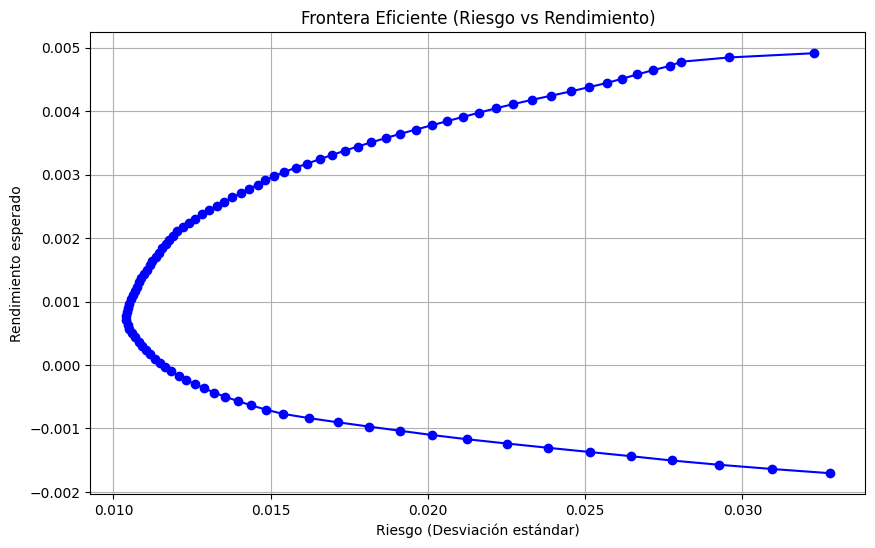

In [ ]:
# GRÁFICAMOS LA FRONTERA EFICIENTE

# Calculamos los rendimientos esperados de los activos
rendimientos_esperados = log_returns.mean()

# Llamamos a la función "frontera_eficiente" para obtener los retornos, riesgos y pesos optimizados
retornos, riesgos, pesos_optimizados = frontera_eficiente(rendimientos_esperados, covariance_correlated)

# Llamamos a la función "graficar_frontera" para poder graficar la frontera eficiente
graficar_frontera(retornos, riesgos)

### Aquí puedes hacer una interpretación de la frontera eficiente

**Preguntas a responder**

1. **¿Cómo utilizarías la frontera eficiente para construir un portafolio óptimo dado un nivel de aversión al riesgo?**
Reflexiona sobre cómo los distintos puntos de la frontera ofrecen diferentes perfiles de riesgo y rendimiento, y cómo seleccionarlos según las preferencias del inversionista.

2. **¿Qué implicaciones tiene el hecho de que un portafolio se encuentre dentro o fuera de la frontera eficiente?**
Evalúa cómo la ineficiencia de un portafolio puede afectar tanto el rendimiento como el riesgo y qué ajustes se deberían hacer para optimizarlo.

3. **¿Cómo cambiaría la composición de un portafolio si el inversor desea minimizar el riesgo, pero también maximizar el retorno?**
Explora el balance entre riesgo y retorno, y cómo seleccionar el punto óptimo en la frontera eficiente.

4. **Si los activos que forman parte de la frontera eficiente cambian con el tiempo, ¿qué ajustes estratégicos deberías hacer en el portafolio?**
Reflexiona sobre cómo las correlaciones, la volatilidad y los rendimientos pueden afectar la frontera eficiente en diferentes periodos de tiempo.

5. **¿Cómo puede un portafolio bien diversificado posicionarse en la frontera eficiente?**
Evalúa si la diversificación es suficiente para alcanzar un punto en la frontera eficiente y qué ajustes harías para optimizarlo.

 ### **Respuestas**
 1. La frontera eficiente muetra la relación entre riesgo y rendimiento de los portafolios óptimos. Cada punto en esta frontera representa el rendimiento esperado máximo para un nivel dado de riesgo (volatilidad), o el riesgo mínimo para un nivel dado de rendimiento esperado.

 Para construir un portafolio óptimo:

 * Identificar el nivel de aversión al riesgo del inversionista:
   * Comprender si el inversionista es conservador, moderado o agresivo. El conservador buscará maximizar el rendimiento con el menor riesgo posible, uno agresivo puede aceptar un mayor riesgo por un rendimiento potencialmente más alto.
 * Localizar el punto en la frontera eficiente:
    * En la frontera eficiente, los portafolios se ubican a lo largo de una curva convexa. Para un inversionista conservador, se buscaría un punto más a la izquierda en la curva, que representa menor riesgo y, por lo tanto, un rendimiento esperado más bajo. Para un inversionista agresivo, se seleccionaría un punto más a la derecha, donde el rendimiento esperado es más alto, pero también lo es el riesgo.
  * Construir el portafolio:
   * combinamos activos que produzcan el rendimiento y riesgo deseados. Esto se puede hacer a través de la asignación de activos que maximice la diversificación, equilibrando activos con diferentes correlaciones y características de riesgo.
 * Considerar la línea de la tasa libre de riesgo:
  * agregar al gráfico, representando el rendimiento de un activo libre de riesgo. Este punto representa el portafolio de mercado óptimo, combinando activos de riesgo con el activo libre de riesgo para lograr un perfil de riesgo-rendimiento deseado.


2. La ubicación de un portafolio en relación con la frontera eficiente tiene importantes implicaciones para su rendimiento y riesgo.

Implicaciones:

* Portafolio dentro de la frontera eficiente:

 * Rendimiento óptimo: está maximizando el rendimiento esperado para su nivel de riesgo. (No hay forma de mejorar el rendimiento sin asumir un mayor riesgo).

 * Diversificación adecuada: Los activos están bien diversificados, se reduce el riesgo y aprovecha las relaciones de correlación entre los activos.

* Portafolio fuera de la frontera eficiente:
 * Ineficiencia: aquellos que se encuentran por debajo de la frontera pueden mejorar su rendimiento sin aumentar el riesgo.
 * Riesgo excesivo o rendimiento insuficiente:
   * Si el portafolio está por encima de la frontera, indica que el rendimiento es bajo en relación con el riesgo asumido, e implica que el inversionista está tomando un riesgo innecesario.
   * Si el portafolio está por debajo de la frontera, indica que el rendimiento esperado es insuficiente para el nivel de riesgo.

* Optimización del portafolio:
 * Revisión de la composición del portafolio  
 * Diversificación
 * Optimización en la asignación de activos
 * Emonitoreo continuo

3. Para construir un portafolio que minimice el riesgo y maximice el retorno, el objetivo es encontrar un punto en la frontera eficiente que logre el mejor balance entre ambos factores. Este punto, conocido como el portafolio óptimo, se ajusta al perfil de riesgo del inversor.
La estrategia para alcanzar el portafolio óptimo incluye una combinación de activos diversificados, activos de baja correlación y una asignación adecuada entre activos de riesgo y seguros. Esto maximiza el rendimiento ajustado al riesgo sin exceder la tolerancia del inversor.

4. Si los activos de la frontera eficiente cambian según el tiempo, debemos ajustar el portafolio para mantener un balance óptimo de riesgo y rendimiento. Esto implica revisar la ponderación de los activos, agregar activos de baja correlación para mejorar la diversificación, ajustar la exposición a activos volátiles, y monitorear el rendimiento ajustado al riesgo. Estos ajustes ayudan a mantener  el perfil de riesgo deseado, adaptándose a cambios en correlación, volatilidad y rendimientos.

5. Un portafolio bien diversificado reduce el riesgo, pero no garantiza alcanzar la frontera eficiente. Para lograrlo, es necesario optimizar las ponderaciones de los activos y ajustar el portafolio en respuesta a cambios en correlación y volatilidad. Así, se maximiza el rendimiento ajustado al riesgo y se mantiene el portafolio en una posición óptima.

















### <b> Código de la gráfica en la cual podemos ver el portafolio de mínima varianza, los portafolios eficientes y los portafolios ineficientes</b>


**Modifica, o agrega, el código para señalar el portafolio de mínima varianza con un color (rojo), y diferenciar con un color los portafolios eficientes, y con un color gris claro, los portafolios ineficientes.** (Vale 2.5 pts)

In [ ]:
# Función para graficar la frontera eficiente
def graficar_fronteraE(retornos, riesgos):
    """
    Grafica la frontera eficiente mostrando el riesgo vs el rendimiento,
    señalando el portafolio de mínima varianza.

    Parámetros:
    - retornos (array): Lista de retornos de los portafolios en la frontera eficiente.
    - riesgos (array): Lista de riesgos (desviación estándar) de los portafolios.
    """
    # Convertir los retornos y los riesgos a objetos de tipo "array" de numpy para evitar errores
    retornos = np.array(retornos)
    riesgos = np.array(riesgos)

    plt.figure(figsize=(10, 6))

    # Determinar el portafolio de mínima varianza
    # Buscamos el índice del valor mínimo del array de riesgo
    min_riesgo_idx = np.argmin(riesgos)
    min_riesgo = riesgos[min_riesgo_idx]
    min_ret = retornos[min_riesgo_idx]

    # Graficar solo los portafolios eficientes que están por encima del portafolio de mínima varianza
    plt.plot(riesgos[retornos >= min_ret], retornos[retornos >= min_ret], 'blue', marker='o', label='Portafolios Eficientes')

    # Graficamos el portafolio de mínima varianza
    plt.scatter(min_riesgo, min_ret, color='red', label='Portafolio de Mínima Varianza', s=100)
    # Imprimimos el riesgo y el rendimiento del portafolio de mínima varianza
    print(f"El portafolio de mínima varianza es {min_riesgo, min_ret}\n")

    # Graficamos los portafolios ineficientes de otro color (verde)
    for i in range(len(retornos)):
        # Filtramos las parejas de varianza y rendimientos que son menores al de mínima varianza
        if retornos[i] < min_ret:  # Si el rendimiento del portafolio es menor al rendimiento de mínima varianza
            plt.scatter(riesgos[i], retornos[i], color='green', label='Portafolios Ineficientes' if i == 0 else "", alpha=0.5)

    plt.title('Frontera Eficiente (Riesgo vs Rendimiento)')
    plt.xlabel('Riesgo (Desviación estándar)')
    plt.ylabel('Rendimiento esperado')
    plt.grid(True)
    plt.legend()
    plt.show()

El portafolio de mínima varianza es (0.010386392951773156, 0.0007683556167834738)



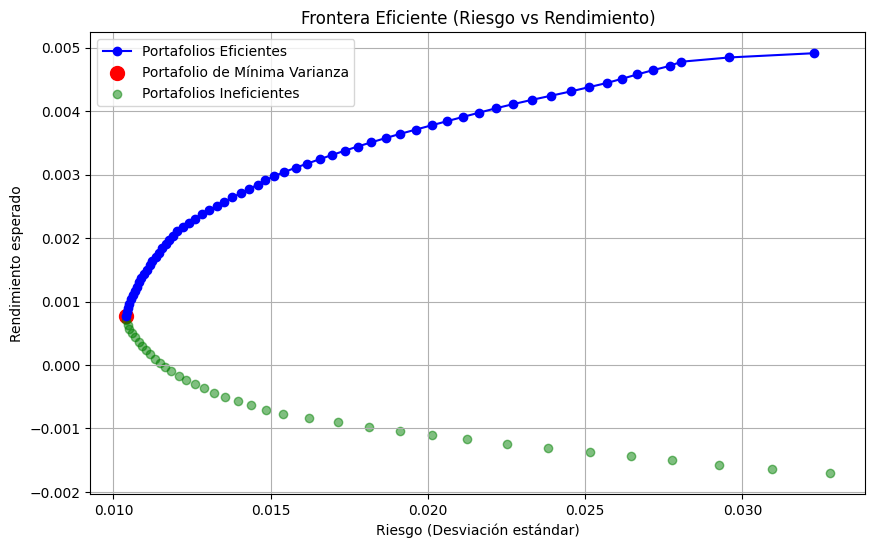

In [ ]:
# Generar la frontera eficiente
retornos, riesgos, pesos_optimizados = frontera_eficiente(rendimientos_esperados, covariance_correlated)

# Graficar la frontera eficiente
graficar_fronteraE(retornos, riesgos)